<a href="https://colab.research.google.com/github/dsavla/study/blob/main/Sentiment_Tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install dependencies
!pip install pandas #for data re-processing
!pip install tweepy #for tweeter authentication and data
!pip install vaderSentiment #for sentiment analysis

     |████████████████████████████████| 125 kB 5.2 MB/s 


In [ ]:
import pandas as pd
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
#My Twitter API Credentials

#Twitter authentication and getting tweets
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(api_key, api_secret)

api = tweepy.API(auth)

tweets = api.search('Apple Watch', count=200)

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

display(data.head(0))

,Tweets


In [ ]:
#print some attributes of a tweet
print("ID: ", tweets[0].id)
print("TWEET TEXT: ", tweets[0].text)
print("CREATED AT: ", tweets[0].created_at)
print("SOURCE: ", tweets[0].source)
print("FAVORITE COUNT: ", tweets[0].favorite_count)
print("RETWEET COUNT: ", tweets[0].retweet_count)
print("GEO", tweets[0].geo)
print("COORDINATES: ", tweets[0].coordinates)
print("ENTITIES: ", tweets[0].entities)

ID:  1436546506492874754
TWEET TEXT:  RT @JasonMillet43: Side note @cryptostacys look amazing as Apple Watch backgrounds! https://t.co/jV58xlZwjX
CREATED AT:  2021-09-11 04:25:51
SOURCE:  Twitter for Android
FAVORITE COUNT:  0
RETWEET COUNT:  1
GEO None
COORDINATES:  None
ENTITIES:  {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'JasonMillet43', 'name': 'jason miller', 'id': 47103442, 'id_str': '47103442', 'indices': [3, 17]}, {'screen_name': 'cryptostacys', 'name': 'Hunnys 10k | cryptostacys.eth', 'id': 1377794728343842825, 'id_str': '1377794728343842825', 'indices': [29, 42]}], 'urls': [], 'media': [{'id': 1436546022642233345, 'id_str': '1436546022642233345', 'indices': [84, 107], 'media_url': 'http://pbs.twimg.com/media/E--i_xcXMAEt-fd.jpg', 'media_url_https': 'https://pbs.twimg.com/media/E--i_xcXMAEt-fd.jpg', 'url': 'https://t.co/jV58xlZwjX', 'display_url': 'pic.twitter.com/jV58xlZwjX', 'expanded_url': 'https://twitter.com/JasonMillet43/status/1436546028350722049

In [ ]:
#import a LEXICON
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#perform sentiment analysis
sid = SentimentIntensityAnalyzer()

sentiment_scores = []

for index, row in data.iterrows():
  sentiment_score = sid.polarity_scores(row['Tweets'])
  sentiment_scores.append(sentiment_score)
  
score_evaluation = pd.Series(sentiment_scores)
data['Polarity'] = score_evaluation.values

display(data.head(10))

,Tweets,Polarity
0,RT @JasonMillet43: Side note @cryptostacys loo...,"{'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp..."
1,これは期待。\n体温自動測定&amp;記録できるようになれば、健康管理が捗りそう。\n\n2...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,RT @into__universe: [🎥] SSAP-DANCE 몬스타엑스 | 선공개...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,RT @___gutta: We at the point where an NFT on ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,RT @FigaroMisz: 発売しててチェックしてない人は勿論いると思うんですけどもう次...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,RT @BlinkVotingCrew: 📣 DO NOT STOP ON STREAMIN...,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp..."
6,RT @into__universe: [🎥] SSAP-DANCE 몬스타엑스 | 선공개...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7,Elastic Pearl Style Band for Apple Watch with ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8,RT @into__universe: [🎥] SSAP-DANCE 몬스타엑스 | 선공개...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,RT @RamenhaeMXMB: How to support one day?\n\nS...,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp..."


In [ ]:
hashtag = "#ManchesterTest"
query = tweepy.Cursor(api.search, q=hashtag).items(1000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print(tweets)

[{'Tweet': '@RaviShastriOfc and @BCCI: A case of Conflict of Interest.\n\n#RaviShastri #ManchesterTest #indiavsEngland #INDvsEND… https://t.co/KBmStUHcRA', 'Timestamp': datetime.datetime(2021, 9, 11, 4, 27, 16)}, {'Tweet': 'RT @mmonlinebet: #ManchesterTest Is Postponed. \n\n#ENGvIND | #MM. https://t.co/D5GzGp1Vu4', 'Timestamp': datetime.datetime(2021, 9, 11, 4, 26, 2)}, {'Tweet': "I am sorry, but don't support @BCCI  anyone involved in this decision.  \nThe game &amp; fans are much bigger &amp; greater… https://t.co/MnuOnVaTde", 'Timestamp': datetime.datetime(2021, 9, 11, 4, 25, 38)}, {'Tweet': 'Jarvo 69 On 5th Test Cancellation\nWatcH it👇👇👇👇👇👇👇👇👇👉https://t.co/BkfNnt0pEB\n\n#Jarvo #ManchesterTest #INDvENG #jarvo69', 'Timestamp': datetime.datetime(2021, 9, 11, 4, 24, 35)}, {'Tweet': 'BCCI\'s media wing should be named "BCCI Sources".\n\n#BCCI \n#ECB \n#ENGvIND \n#ENGvsIND\n#ManchesterTest \n#IPL', 'Timestamp': datetime.datetime(2021, 9, 11, 4, 18, 1)}, {'Tweet': 'RT @BoknRoll: BCCI canc

In [ ]:
india_handle = ['India','Ravi', 'Shastri', 'Virat', 'BCCI', 'IPL']
england_handle = ['England', 'ECB', 'Anderson']

In [ ]:
df = pd.DataFrame.from_dict(tweets)
df.head()

def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

df['India'] = df['Tweet'].apply(lambda x: identify_subject(x, india_handle)) 
df['England'] = df['Tweet'].apply(lambda x: identify_subject(x, england_handle))
df.head(10)

,Tweet,Timestamp,India,England
0,@RaviShastriOfc and @BCCI: A case of Conflict ...,2021-09-11 04:27:16,1,1
1,RT @mmonlinebet: #ManchesterTest Is Postponed....,2021-09-11 04:26:02,0,0
2,"I am sorry, but don't support @BCCI anyone in...",2021-09-11 04:25:38,1,0
3,Jarvo 69 On 5th Test Cancellation\nWatcH it👇👇👇...,2021-09-11 04:24:35,0,0
4,"BCCI's media wing should be named ""BCCI Source...",2021-09-11 04:18:01,1,1
5,RT @BoknRoll: BCCI cancels last test vs @ECB_c...,2021-09-11 04:14:40,1,1
6,RT @tandon_20: #BreakingNews #bigbreaking \n #...,2021-09-11 04:13:43,1,1
7,RT @vikrantgupta73: The max they can delay the...,2021-09-11 04:12:51,0,0
8,#Fifthtest #INDvENG #ENGvIND #BCCI #ECB #Manc...,2021-09-11 04:11:22,1,1
9,https://t.co/c87QTi65XY\nബിസിസിഐയും ഇംഗ്ലണ്ട് ...,2021-09-11 04:07:42,0,0


In [ ]:
# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#ManchesterTest']

def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Tweet,Timestamp,India,England,Processed Tweet
0,@RaviShastriOfc and @BCCI: A case of Conflict ...,2021-09-11 04:27:16,1,1,@RaviShastriOfc @BCCI: A case Conflict Interes...
1,RT @mmonlinebet: #ManchesterTest Is Postponed....,2021-09-11 04:26:02,0,0,@mmonlinebet: Is Postponed. #ENGvIND | #MM. ht...
2,"I am sorry, but don't support @BCCI anyone in...",2021-09-11 04:25:38,1,0,"I sorry, support @BCCI anyone involved decisio..."
3,Jarvo 69 On 5th Test Cancellation\nWatcH it👇👇👇...,2021-09-11 04:24:35,0,0,Jarvo 69 On 5th Test Cancellation WatcH it👇👇👇👇...
4,"BCCI's media wing should be named ""BCCI Source...",2021-09-11 04:18:01,1,1,"BCCI's medium wing named ""BCCI Sources"". #BCCI..."


In [ ]:


print('Base review\n', df['Tweet'][0])
print('\n------------------------------------\n')
print('Cleaned and lemmatized review\n', df['Processed Tweet'][0])



Base review
 @RaviShastriOfc and @BCCI: A case of Conflict of Interest.

#RaviShastri #ManchesterTest #indiavsEngland #INDvsEND… https://t.co/KBmStUHcRA

------------------------------------

Cleaned and lemmatized review
 @RaviShastriOfc @BCCI: A case Conflict Interest. #RaviShastri #indiavsEngland #INDvsEND… https://t.co/KBmStUHcRA


In [ ]:
# Calculate polarity
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'England', 'India', 'polarity', 'subjectivity']].head()


,Processed Tweet,England,India,polarity,subjectivity
0,@RaviShastriOfc @BCCI: A case Conflict Interes...,1,1,0.0,0.000000
1,@mmonlinebet: Is Postponed. #ENGvIND | #MM. ht...,0,0,0.0,0.000000
2,"I sorry, support @BCCI anyone involved decisio...",0,1,-0.3,0.633333
3,Jarvo 69 On 5th Test Cancellation WatcH it👇👇👇👇...,0,0,0.0,0.000000
4,"BCCI's medium wing named ""BCCI Sources"". #BCCI...",1,1,0.0,0.000000


In [ ]:
import numpy as np

display(df[df['India']==1][['India','polarity','subjectivity']].groupby('India').agg([np.mean, np.max, np.min, np.median]))
df[df['England']==1][['England','polarity','subjectivity']].groupby('England').agg([np.mean, np.max, np.min, np.median])

polarity                   subjectivity                 
           mean amax  amin median         mean amax amin median
India                                                          
1      0.211931  1.0 -0.75    0.0     0.377654  1.0  0.0    0.5

polarity                  subjectivity                    
             mean amax amin median         mean amax amin    median
England                                                            
1        0.031766  1.0 -0.5    0.0     0.381768  1.0  0.0  0.376389

In [ ]:
england = df[df['England']==1][['Timestamp', 'polarity']]
england = england.sort_values(by='Timestamp', ascending=True)
england['MA Polarity'] = england.polarity.rolling(10, min_periods=3).mean()

india = df[df['India']==1][['Timestamp', 'polarity']]
india = india.sort_values(by='Timestamp', ascending=True)
india['MA Polarity'] = india.polarity.rolling(10, min_periods=3).mean()
india.head()

,Timestamp,polarity,MA Polarity
998,2021-09-10 12:57:11,0.227273,NaN
997,2021-09-10 12:57:28,-0.025000,NaN
995,2021-09-10 12:58:01,0.227273,0.143182
994,2021-09-10 12:58:02,0.227273,0.164205
991,2021-09-10 12:58:55,0.227273,0.176818


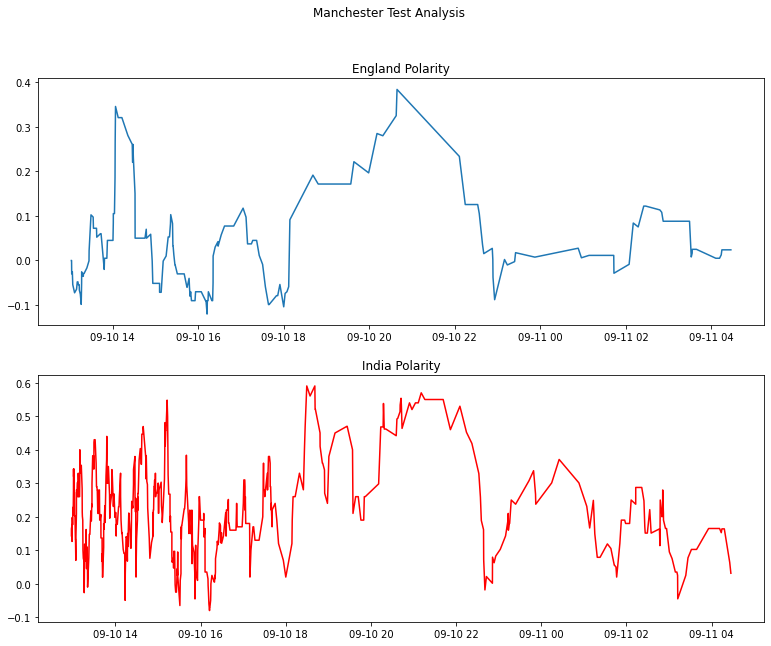

In [ ]:
# Import seaborn and matplotlib for viz
from matplotlib import pyplot as plt
ind = 'red'
eng = 'blue'
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(england['Timestamp'], england['MA Polarity'])
axes[0].set_title("\n".join(["England Polarity"]))
axes[1].plot(india['Timestamp'], india['MA Polarity'], color='red')
axes[1].set_title("\n".join(["India Polarity"]))

fig.suptitle("\n".join(["Manchester Test Analysis"]), y=0.98)

plt.show()
